<a href="https://colab.research.google.com/github/IrisFDTD/AI-UNIZAR-course/blob/main/regression/ai_unizar_course_regression_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/"><img alt="Licencia Creative Commons" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png" /></a><br /><span xmlns:dct="http://purl.org/dc/terms/" property="dct:title">*Introducción a la inteligencia artificial: redes neuronales avanzadas con Tensorflow-Keras*</span> por <span xmlns:cc="http://creativecommons.org/ns#" property="cc:attributionName">Sergio Gutiérrez Rodrigo (sergut@unizar.es)</span> se distribuye bajo una <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Licencia Creative Commons Atribución-NoComercial-CompartirIgual 4.0 Internacional</a>.

```
Sergio G Rodrigo
Departamento de Física Aplicada
Universidad de Zaragoza
Instituto de Nanociencia y Materiales de Aragón (INMA)
C/ Pedro Cerbuna, 12, 50009, Zaragoza, España
```






# **Advanced Neural Networks with TensorFlow-Keras**

---
#**Regression with Dense Neural Networks (DNN) (II)**
---
A neural network as a subrogate for the function $y(x)=exp(-x)$, trained in the range $x \in [0,x_{max}]$.

# Main libraries

In [1]:
# Tensorflow Keras and rest of the packages
import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras.layers import Input,Dense
from tensorflow.keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt

# Training data

In [2]:
n_train = 20
xmin = 0
xmax = 4

# Definition of the function domain
x_train=np.linspace(xmin,xmax,n_train)

# The real solution y(x) for training evaluation
y_train=np.exp(-x_train)

# Hyperparameters

In [3]:
# Hiperparameters
epochs = 100
lr=0.001

# Define the model

# (I) Define a standard Keras model

In [4]:
input=Input(shape=(1,))
x=Dense(50, activation='elu')(input)
x=Dense(50, activation='elu')(x)
output = Dense(1,activation=None)(x)
model= Model(input,output)

model.summary()

# Definition of the metrics, optimizer and loss
loss= tf.keras.losses.MeanSquaredError()
metrics= tf.keras.metrics.MeanSquaredError()
optimizer= Adam(learning_rate=lr)

model.compile(loss=loss,
          optimizer=optimizer,
          metrics=[metrics])

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 1)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 50)                  │             100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 50)                  │           2,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,701 (10.55 KB)

 Trainable params: 2,701 (10.55 KB)

 Non-trainable params: 0 (0.00 B)

# Tensorflow-Keras Model from scratch

In [5]:
class Model_from_scratch(tf.keras.Model):
    def train_step(self, data):
        # Training points and the analytical (exact) solution at this points
        x, y_exact = data
        # Calculate the gradients and update weights and bias
        with tf.GradientTape() as tape:
            y_NN  = self(x, training=True)
            loss=self.compiled_loss(y_exact,y_NN)
        gradients = tape.gradient(loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(gradients, self.trainable_weights))
        self.compiled_metrics.update_state(y_exact, y_NN)
        return {m.name: m.result() for m in self.metrics}

# Tensorflow-Keras loss and metrics from scratch

In [6]:
# Custom MSE Loss function
def mse_loss_from_scratch(y_true, y_pred):
    return tf.reduce_mean(tf.square(y_true - y_pred))

# Custom MSE Metric function
def mse_metric_from_scratch(y_true, y_pred):
    mse = tf.reduce_mean(tf.square(y_true - y_pred))
    return mse


# List the methods available for a given class ("package")

In [7]:
# List the methods of a given package
lib=tf.keras.Model
method_list = [method for method in dir(lib) if method.startswith('_') is False]

print("Funciones disponibles en",lib.__name__)
for func in method_list:
  print("Función disponible:",func)

Funciones disponibles en Model
Función disponible: add_loss
Función disponible: add_metric
Función disponible: add_variable
Función disponible: add_weight
Función disponible: build
Función disponible: build_from_config
Función disponible: call
Función disponible: compile
Función disponible: compile_from_config
Función disponible: compiled_loss
Función disponible: compiled_metrics
Función disponible: compute_dtype
Función disponible: compute_loss
Función disponible: compute_mask
Función disponible: compute_metrics
Función disponible: compute_output_shape
Función disponible: compute_output_spec
Función disponible: count_params
Función disponible: distribute_reduction_method
Función disponible: distribute_strategy
Función disponible: dtype
Función disponible: dtype_policy
Función disponible: evaluate
Función disponible: export
Función disponible: fit
Función disponible: from_config
Función disponible: get_build_config
Función disponible: get_compile_config
Función disponible: get_config
F

# (II) Define a Tensorflow-Keras model with custom objects

In [8]:
input=Input(shape=(1,))
x=Dense(50, activation='elu')(input)
x=Dense(50, activation='elu')(x)
output = Dense(1,activation=None)(x)
model= Model_from_scratch(input,output)

model.summary()

# Definition of the metrics, optimizer and loss
loss= mse_loss_from_scratch
metrics= mse_metric_from_scratch
optimizer= Adam(learning_rate=lr)

model.compile(loss=loss,
          optimizer=optimizer,
          metrics=[metrics])

Model: "model_from_scratch"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 1)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 50)                  │             100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 50)                  │           2,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,701 (10.55 KB)

 Trainable params: 2,701 (10.55 KB)

 Non-trainable params: 0 (0.00 B)

# Run the model

In [9]:
history=model.fit(x_train, y_train,batch_size=1,epochs=epochs)

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py:607: UserWarning: `model.compiled_loss()` is deprecated. Instead, use `model.compute_loss(x, y, y_pred, sample_weight, training)`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py:582: UserWarning: `model.compiled_metrics()` is deprecated. Instead, use e.g.:
```
for metric in self.metrics:
    metric.update_state(y, y_pred)
```

  return self._compiled_metrics_update_state(


20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - mse_metric_from_scratch: 0.4012 - loss: 0.4618
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - mse_metric_from_scratch: 0.1011 - loss: 0.0424 
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - mse_metric_from_scratch: 0.0636 - loss: 0.1216
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - mse_metric_from_scratch: 0.1033 - loss: 0.1772
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - mse_metric_from_scratch: 0.0902 - loss: 0.1739
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - mse_metric_from_scratch: 0.0558 - loss: 0.2439
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - mse_metric_from_scratch: 0.0338 - loss: 0.2199
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - mse_metric_from_scratch: 0.0093 - loss: 0.1709
Epoch 9/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - mse_metric_from_scratch: 0.0093 - loss: 0.2043
Epoch 10/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - mse_metric_from_scratch: 0.0089 - loss: 0.2334
Epoch 1

##  Evolution of losses during training

In [10]:
loss_vs_epochs,metrics_vs_epochs=history.history.keys()
print(loss_vs_epochs,metrics_vs_epochs)

loss mse_metric_from_scratch


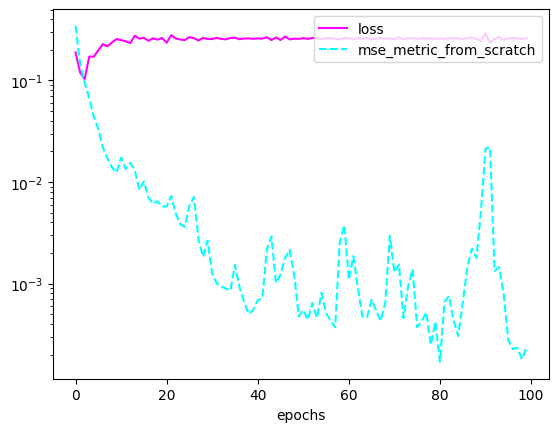

In [11]:
# summarize history for loss and metris
plt.rcParams['figure.dpi'] = 100
plt.plot(history.history[loss_vs_epochs],
         color='magenta',
         label=loss_vs_epochs)
plt.plot(history.history[metrics_vs_epochs],
         color='cyan',
         label=metrics_vs_epochs,linestyle='--')
plt.yscale("log")
plt.xlabel('epochs')
plt.legend(loc='upper right')
plt.show()

# Validation: $y(x)$ vs $y_{NN}(x)$ and its derivatives

## Derivatives with Tensorflow

In [12]:
x=tf.constant(3.0,dtype=tf.float32)
with tf.GradientTape() as tape:
      tape.watch(x)
      y=x**3
dy_dx = tape.gradient(y,x)

print("Tensorflow dy/dx=",dy_dx.numpy())
print("Analitical dy/dx=",3*(x.numpy())**2)

Tensorflow dy/dx= 27.0
Analitical dy/dx= 27.0


## A function to calculate the gradients using a Keras model

In [13]:
def get_gradients(model,x):
  '''
  The gradients y'(x) and y''(x) from the model
  '''
  x = tf.convert_to_tensor(x, dtype=tf.float32)
  with tf.GradientTape() as t:
    t.watch(x)
    with tf.GradientTape() as t2:
          t2.watch(x)
          y = model(x)
    dy_dx = t2.gradient(y,x)
  d2y_dx2 = t.gradient(dy_dx,x)
  return dy_dx,d2y_dx2

## Plot the results

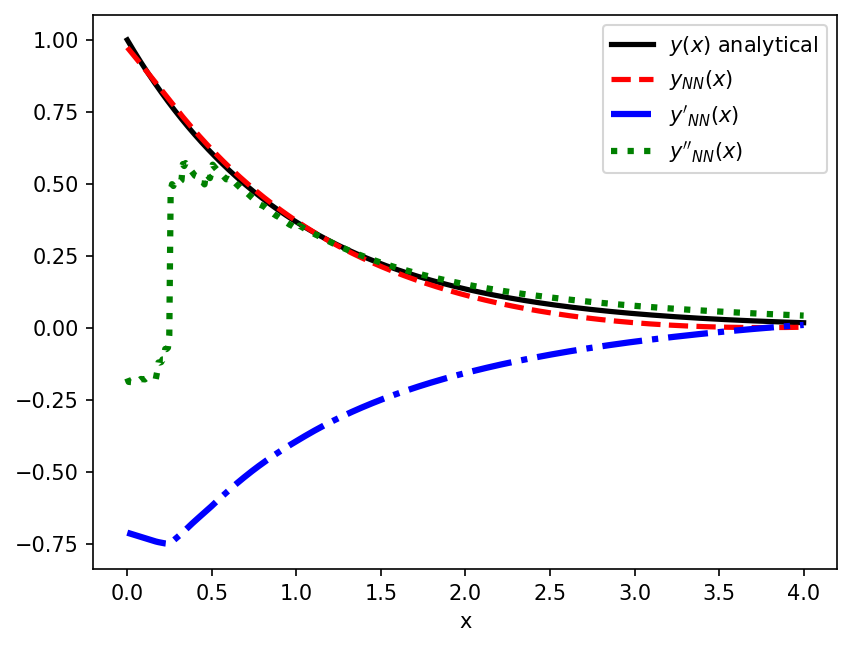

In [14]:
# Check the ODE-NN at different points not included in the training set
n = 500
x=np.linspace(0,4,n)
y_exact=tf.exp(-x)
y_NN=model.predict(x,verbose=0)

dy_dx_NN,d2y_dx2_NN=get_gradients(model,x)

# Plot the results
plt.rcParams['figure.dpi'] = 150
plt.plot(x, y_exact, color="black",linestyle='solid',
                     linewidth=2.5,label="$y(x)$ analytical")
plt.plot(x, y_NN, color="red",linestyle='dashed',
                     linewidth=2.5, label="$y_{NN}(x)$")
plt.plot(x, dy_dx_NN, color="blue",linestyle='-.',
                     linewidth=3.0, label="$y'_{NN}(x)$")
plt.plot(x, d2y_dx2_NN, color="green", linestyle='dotted',
                     linewidth=3.0, label="$y''_{NN}(x)$")
plt.legend()
plt.xlabel("x")
plt.show()